In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV



# Load Data and check for missing values

In [5]:
# load the data into a pandas dataframe

data_path = r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Data\responses_fin_sub.csv"
df1 = pd.read_csv(data_path)

# preview data
df1.info()
df1.head
print(df1)

# total count of NaN values
print(df1.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Music                       1007 non-null   float64
 1   Slow songs or fast songs    1008 non-null   float64
 2   Dance                       1006 non-null   float64
 3   Folk                        1005 non-null   float64
 4   Country                     1005 non-null   float64
 5   Classical music             1003 non-null   float64
 6   Musical                     1008 non-null   float64
 7   Pop                         1007 non-null   float64
 8   Rock                        1004 non-null   float64
 9   Metal or Hardrock           1007 non-null   float64
 10  Punk                        1002 non-null   float64
 11  Hiphop, Rap                 1006 non-null   float64
 12  Horror                      1008 non-null   float64
 13  Thriller                    1009 

# Preprocess Data


*   Drop unnecessary variables
*   Convert categorical variables to numeric



In [6]:
# drop null values
df = df1.dropna()
df = pd.get_dummies(df, columns=['Alcohol','Gender'])

df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
Index: 855 entries, 1 to 1009
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Music                       855 non-null    float64
 1   Slow songs or fast songs    855 non-null    float64
 2   Dance                       855 non-null    float64
 3   Folk                        855 non-null    float64
 4   Country                     855 non-null    float64
 5   Classical music             855 non-null    float64
 6   Musical                     855 non-null    float64
 7   Pop                         855 non-null    float64
 8   Rock                        855 non-null    float64
 9   Metal or Hardrock           855 non-null    float64
 10  Punk                        855 non-null    float64
 11  Hiphop, Rap                 855 non-null    float64
 12  Horror                      855 non-null    float64
 13  Thriller                    855 non-nul

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Alcohol_drink a lot,Alcohol_never,Alcohol_social drinker,Gender_female,Gender_male
1,4.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,...,3.0,3.0,3,3.0,16.0,False,True,False,True,False
2,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,...,4.0,5.0,5,5.0,22.0,True,False,False,False,True
3,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,...,5.0,1.0,4,1.0,19.0,True,False,False,False,True
5,3.0,3.0,3.0,3.0,2.0,5.0,4.0,3.0,3.0,1.0,...,4.0,3.0,1,3.0,19.0,False,False,True,True,False
6,5.0,4.0,3.0,1.0,1.0,2.0,3.0,3.0,5.0,5.0,...,3.0,4.0,4,3.0,19.0,False,False,True,True,False


# Standardize Data using StandardScaler

In [7]:
#Standardize Data
dfcolumns = df.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)


df_scaled.head()



,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Alcohol_drink a lot,Alcohol_never,Alcohol_social drinker,Gender_female,Gender_male
0,-1.136086,-0.389808,-0.076076,-0.259134,-0.118289,-0.786908,0.175185,-0.398955,-1.529334,-0.996015,...,-0.182384,-0.094995,0.092316,-0.512061,-1.581936,-0.538138,2.702031,-1.37779,0.824478,-0.824478
1,-4.195468,-0.389808,-0.931935,-0.259134,-0.118289,-0.786908,-0.613147,-1.262517,0.185526,1.176416,...,0.665109,1.562564,1.639973,1.347014,0.567251,1.858259,-0.370092,-1.37779,-1.212888,1.212888
2,0.393605,-0.389808,-1.787794,-1.141843,-1.046156,-1.587868,-1.401478,-1.262517,0.185526,1.900560,...,1.512602,-1.752554,0.866145,-2.371137,-0.507342,1.858259,-0.370092,-1.37779,-1.212888,1.212888
3,-2.665777,-0.389808,-0.076076,0.623574,-0.118289,1.615972,0.963516,-0.398955,-0.671904,-0.996015,...,0.665109,-0.094995,-1.455340,-0.512061,-0.507342,-0.538138,-0.370092,0.72580,0.824478,-0.824478
4,0.393605,0.835508,-0.076076,-1.141843,-1.046156,-0.786908,0.175185,-0.398955,1.042956,1.900560,...,-0.182384,0.733785,0.866145,-0.512061,-0.507342,-0.538138,-0.370092,0.72580,0.824478,-0.824478


#How Many Clusters
Create an Elbow plot to provide guidance on how many clusters might be needed

c:\Users\trush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\trush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\trush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\trush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

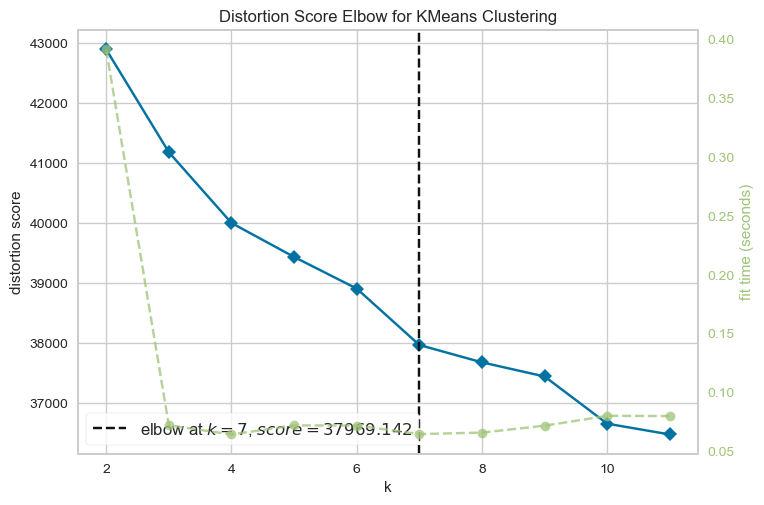

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_scaled)
visualizer.show()

#Generate Clusters and Begin Profiling
- Evaluate cluster sizes
- Compute the mean of each input variable within each cluster

In [9]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=4, random_state=904)
kmclus=kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

#append cluster to original data
df['cluster']=clusters

df.info()

# Evaluate cluster sizes to insure that they are similar
print(df['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = df.groupby('cluster').mean()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
     print(df_desc)



<class 'pandas.core.frame.DataFrame'>
Index: 855 entries, 1 to 1009
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Music                       855 non-null    float64
 1   Slow songs or fast songs    855 non-null    float64
 2   Dance                       855 non-null    float64
 3   Folk                        855 non-null    float64
 4   Country                     855 non-null    float64
 5   Classical music             855 non-null    float64
 6   Musical                     855 non-null    float64
 7   Pop                         855 non-null    float64
 8   Rock                        855 non-null    float64
 9   Metal or Hardrock           855 non-null    float64
 10  Punk                        855 non-null    float64
 11  Hiphop, Rap                 855 non-null    float64
 12  Horror                      855 non-null    float64
 13  Thriller                    855 non-nul

c:\Users\trush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\trush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


# Profile Clusters
- The following code profiles the clusters for one variable
- You should repeat this for any variables of interest - This could include variables that stand out as being important in the preliminary cluster analysis OR this could be other variables (particularly categorical variables) that were not used to generate the cluster but are of interest from a business perspective.  For example, you may want to examine the distrubtion of customer churn within each of these clusters to determine whether certain clusters have a higher percentage of customers who churn (even though churn was not used as an input for creating the clusters)

Romantic Movies


<Figure size 800x400 with 0 Axes>

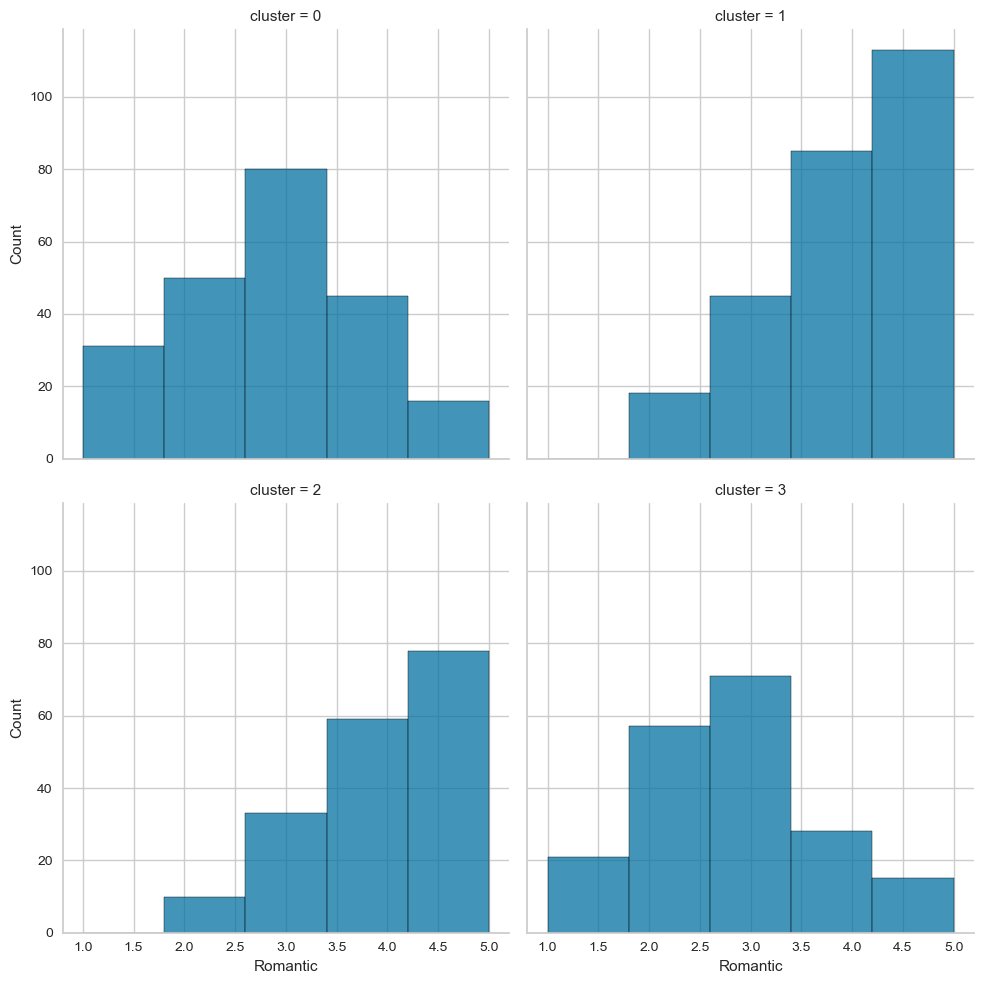

In [10]:
#Romantic Movies
plt.figure(figsize=(8,4))
print("Romantic Movies")
sns.displot(data=df, x="Romantic", bins=5, col='cluster', col_wrap=2, common_bins=True)
plt.show()





In [11]:
dfrom = df[['Romantic', 'cluster']]

df_desc1 = dfrom.groupby('cluster').describe()
print(df_desc1)


        Romantic                                             
           count      mean       std  min  25%  50%  75%  max
cluster                                                      
0          222.0  2.842342  1.120524  1.0  2.0  3.0  4.0  5.0
1          261.0  4.122605  0.932484  2.0  4.0  4.0  5.0  5.0
2          180.0  4.138889  0.907842  2.0  4.0  4.0  5.0  5.0
3          192.0  2.786458  1.073832  1.0  2.0  3.0  3.0  5.0


c:\Users\trush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\trush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.08795470805241475
For n_clusters = 3 The average silhouette_score is : 0.06589588041638342


c:\Users\trush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.056906282402106594


c:\Users\trush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\trush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.048706781714430755
For n_clusters = 6 The average silhouette_score is : 0.05017975915720215


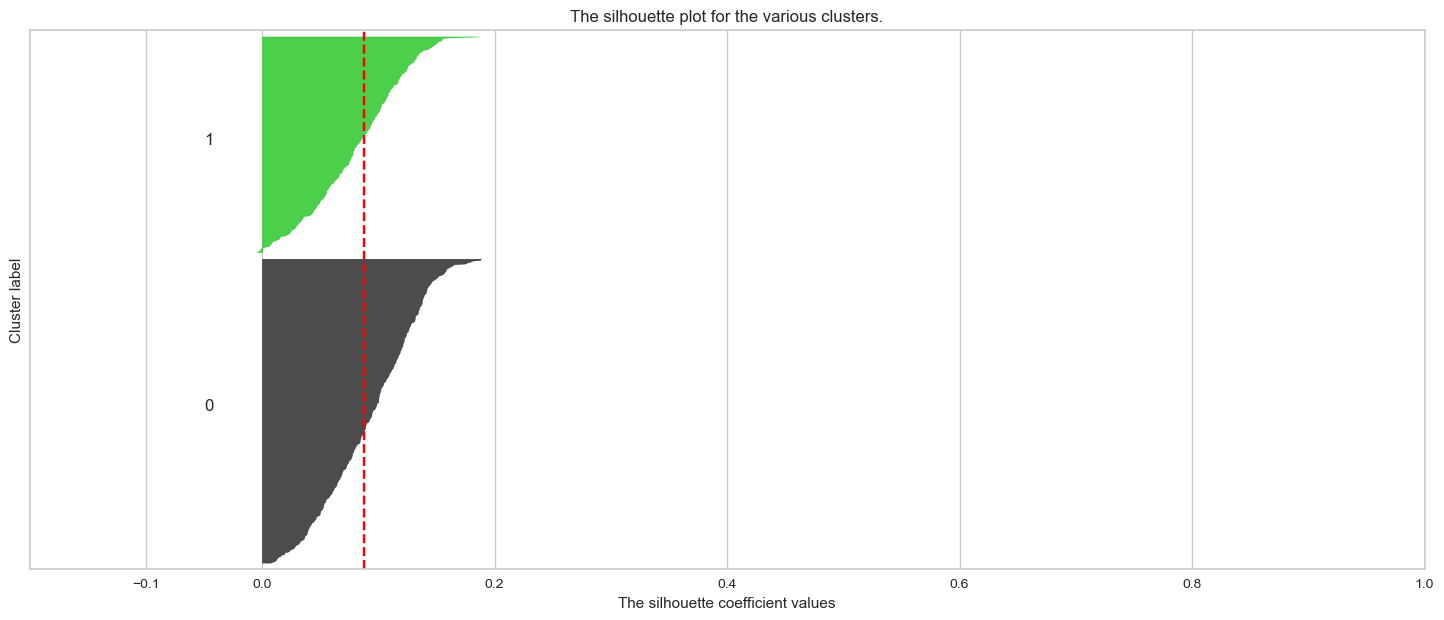

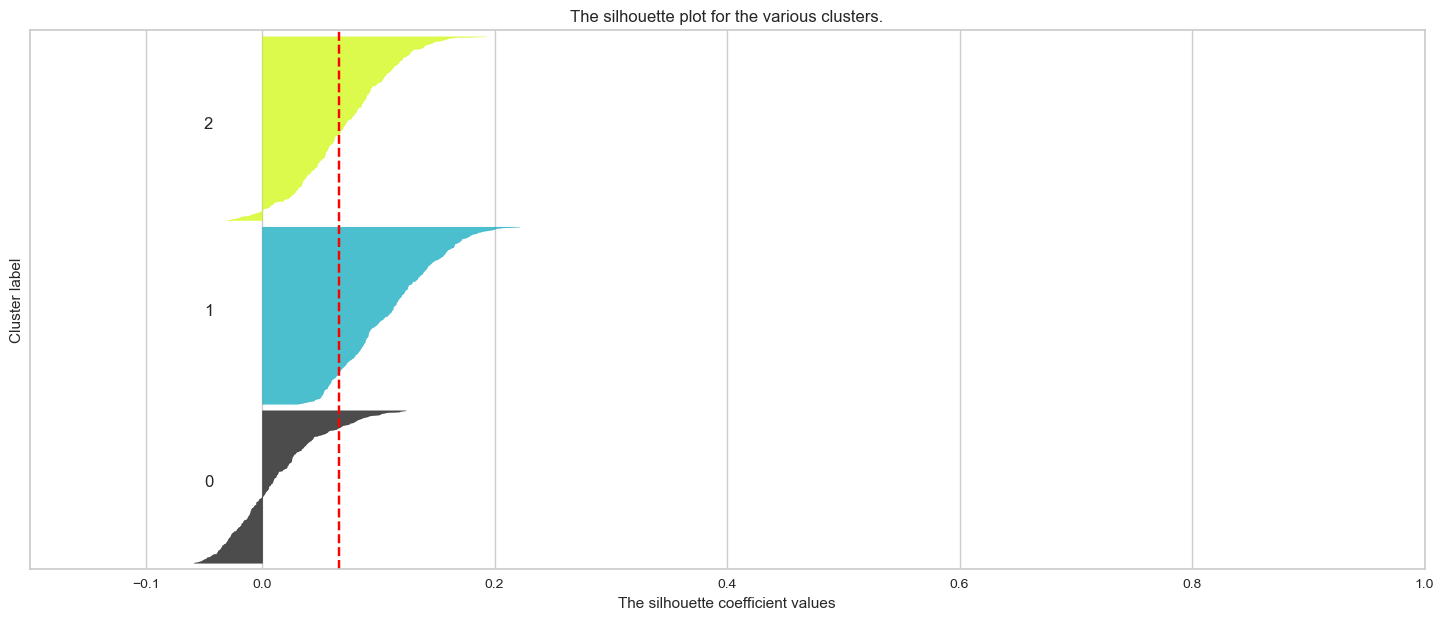

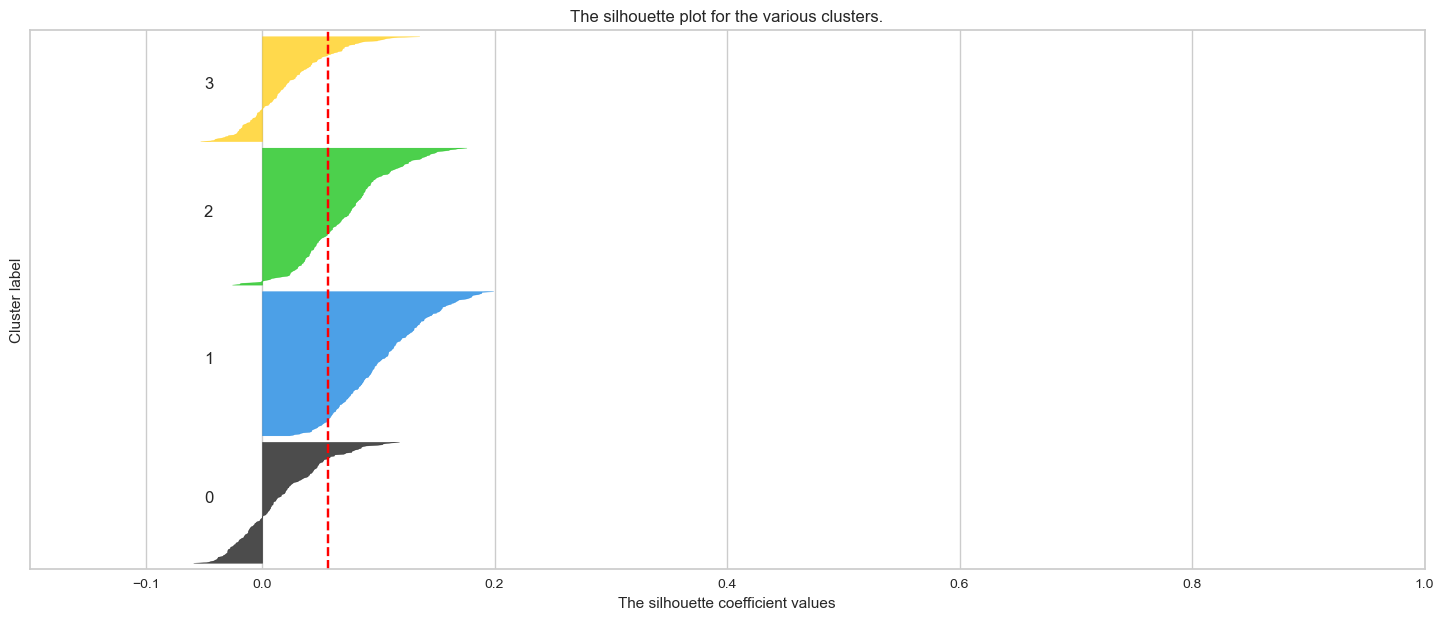

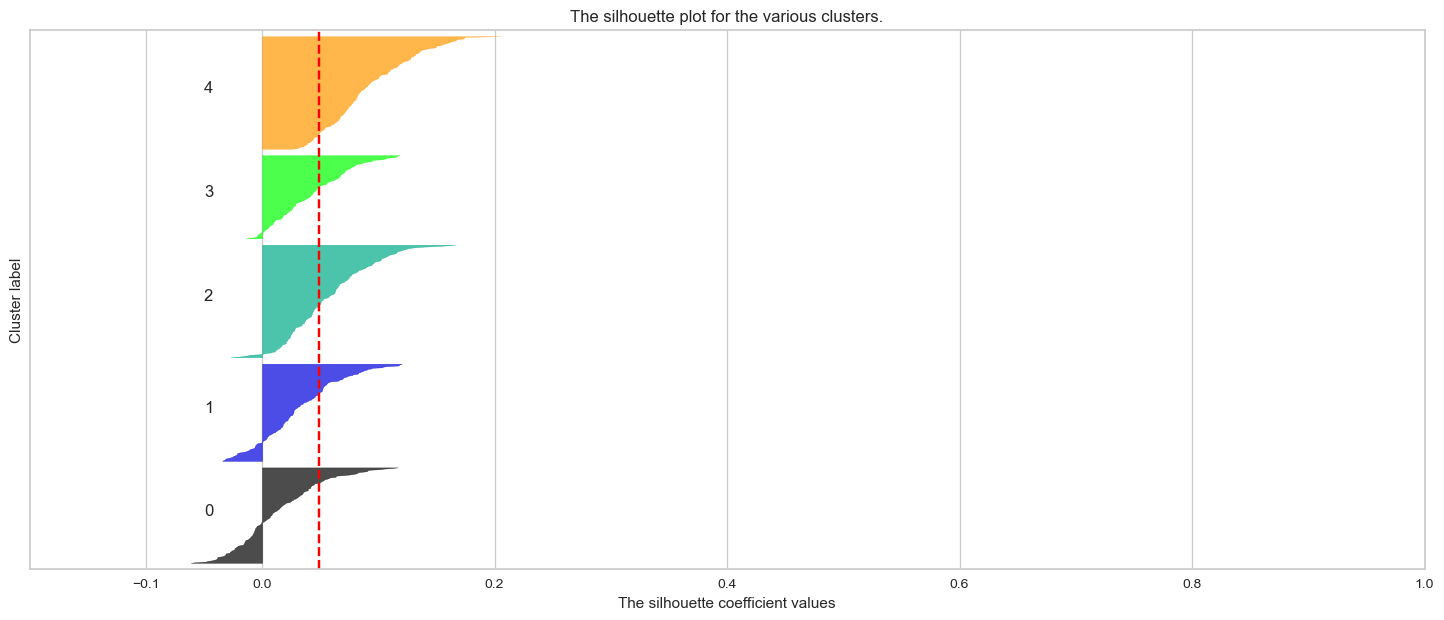

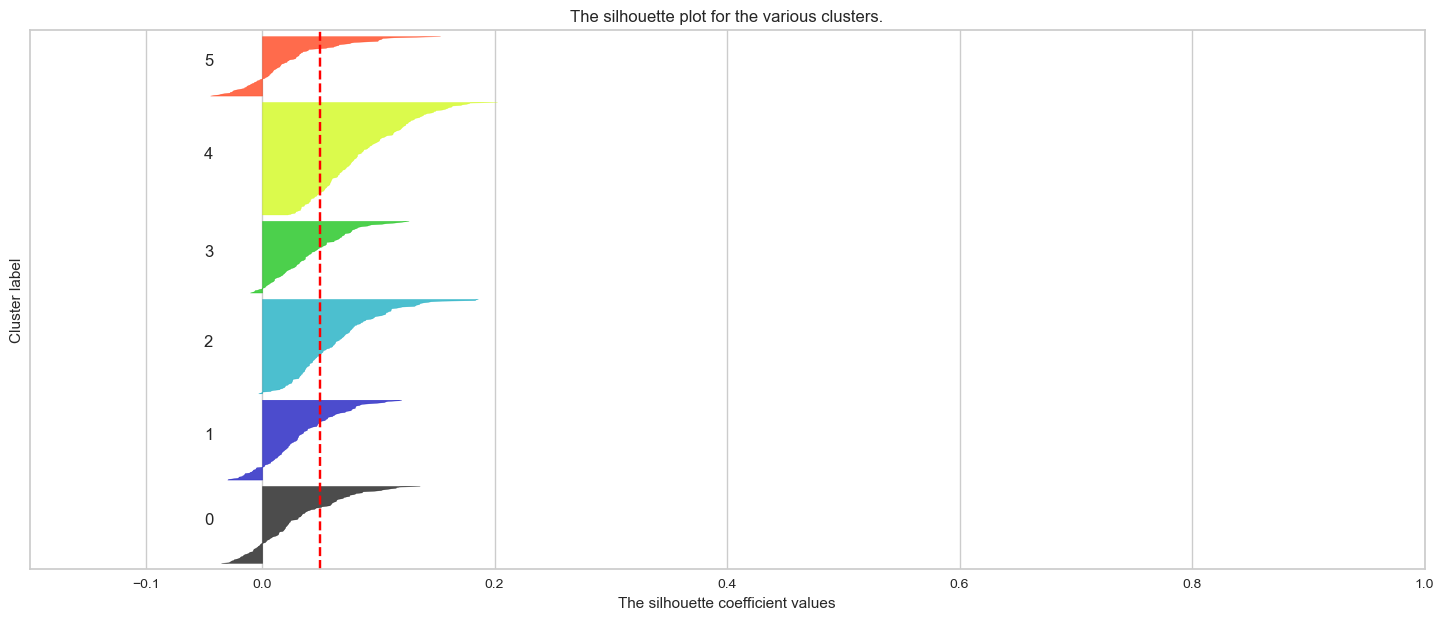

In [12]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X=df_scaled
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



We need the shapes to be the same size, and we want the shapes to go beyond the average score line (red dotted line).

Anything negative may need to move clusters.